In [2]:
%config IPCompleter.use_jedi=False

In [3]:
import tensorflow as ts

In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

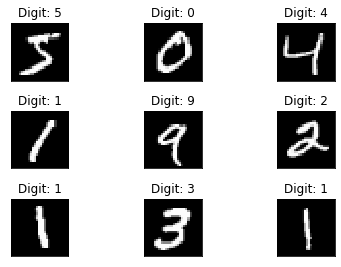

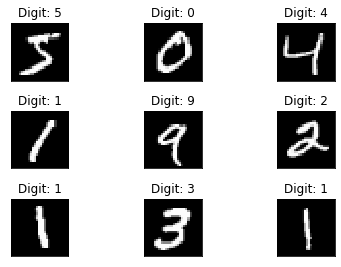

In [6]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [7]:
import numpy as np
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.utils import np_utils

In [8]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [9]:
seed = 4
np.random.seed(seed)

In [10]:
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)
print(X_train.shape)

784
(60000, 28, 28)


In [11]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [12]:
X_train.shape

(60000, 784)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [15]:
y_test.shape

(10000,)

In [16]:
# one hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print("Shape before one-hot encoding: ", y_train.shape)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [17]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [18]:
def baseline_model():
    model = Sequential()
    model.add(Dense(512, input_shape=(784,)))
    model.add(Activation('relu'))                            
    model.add(Dropout(0.2))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # compiling the sequential model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model
    

In [19]:
# compiling the sequential model
model = baseline_model()

In [ ]:
# Fit the model
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
# Final evaluation of the model

scores = model.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/20
469/469 - 9s - loss: 0.2450 - accuracy: 0.9268 - val_loss: 0.1001 - val_accuracy: 0.9688
Epoch 2/20
469/469 - 6s - loss: 0.0986 - accuracy: 0.9694 - val_loss: 0.0820 - val_accuracy: 0.9750
Epoch 3/20
469/469 - 6s - loss: 0.0713 - accuracy: 0.9776 - val_loss: 0.0753 - val_accuracy: 0.9764
Epoch 4/20
469/469 - 6s - loss: 0.0561 - accuracy: 0.9823 - val_loss: 0.0704 - val_accuracy: 0.9781
Epoch 5/20
469/469 - 6s - loss: 0.0459 - accuracy: 0.9853 - val_loss: 0.0708 - val_accuracy: 0.9790
Epoch 6/20
469/469 - 6s - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.0741 - val_accuracy: 0.9790
Epoch 7/20


In [55]:
loss,acc = model.evaluate(X_test, Y_test, verbose=0)
print(model.metrics_names[0],loss,model.metrics_names[1],acc)

loss 0.07699491083621979 accuracy 0.984000027179718


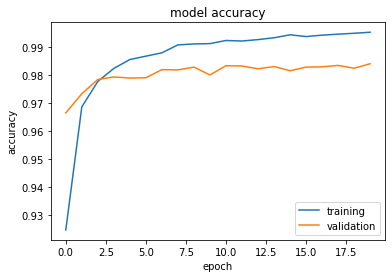

Test loss: 0.077
Test accuracy: 0.984


In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {acc:.3}')

In [58]:
predicted_classes = model.predict_classes(X_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



9840  classified correctly
160  classified incorrectly


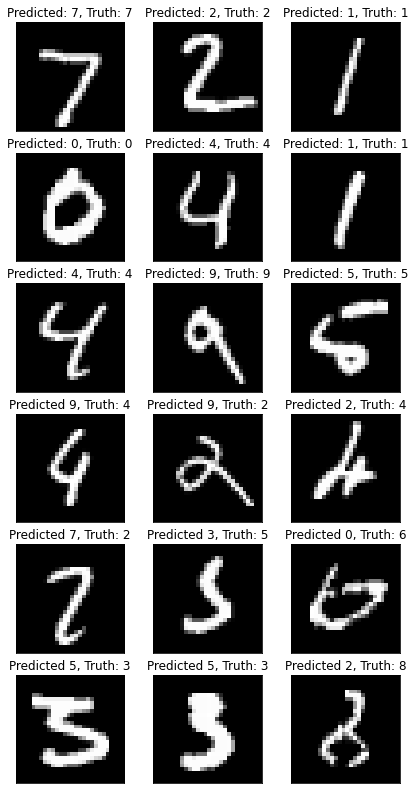

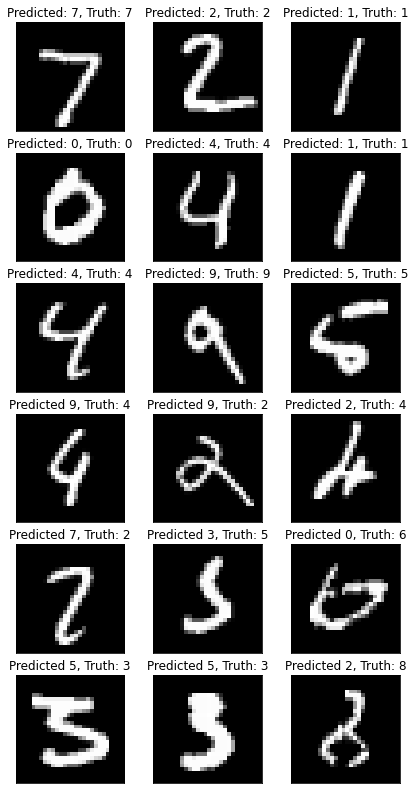

In [63]:
# load the model and create predictions on the test set

predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation